# data driven graphical abstract 
# mitofomer pipeline with embedded mini charts using simulated data

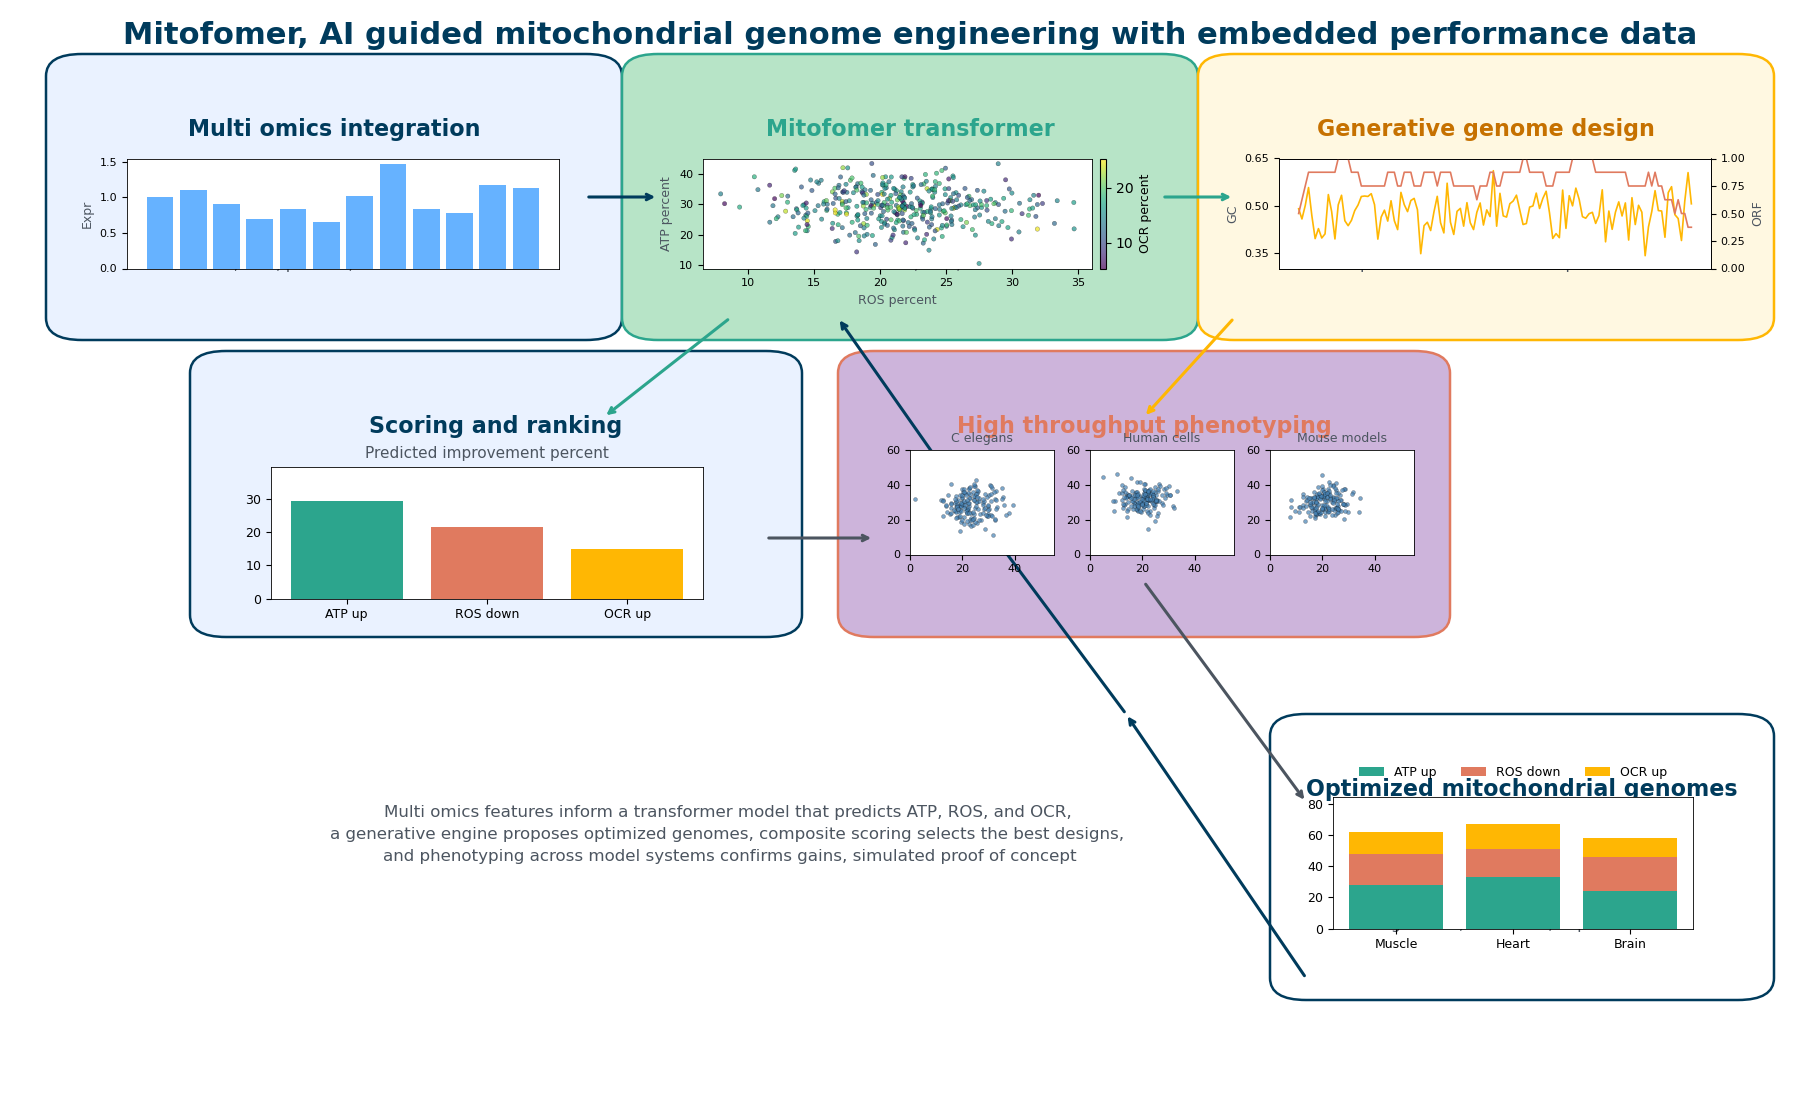

Saved: results/Mitofomer_Graphical_Abstract_DataDriven.png
Saved: results/Mitofomer_Graphical_Abstract_DataDriven.pdf


In [21]:
# import numerical and plotting libraries
import numpy as np                              # numerical arrays and random numbers
import matplotlib.pyplot as plt                 # plotting
import matplotlib.patches as patches            # vector shapes such as rounded boxes
from pathlib import Path                        # file and folder paths

# create an output directory for saved figures
RESULTS_DIR = Path("results")                   # folder named results at the repo root
RESULTS_DIR.mkdir(parents=True, exist_ok=True)  # make the folder if it does not yet exist

# define an oxford inspired color palette
COL = {
    "ox_blue":   "#003B5C",   # deep blue for titles and borders
    "ox_blue_lt":"#66B2FF",   # light blue for bars and fills
    "ox_teal":   "#2CA58D",   # teal accent
    "ox_gold":   "#FFB703",   # golden accent
    "ox_rose":   "#E07A5F",   # rose accent
    "ox_lilac":  "#CDB4DB",   # lilac accent
    "ox_slate":  "#4C5560",   # slate gray for text
    "ox_sky":    "#EAF2FF",   # sky background
    "ox_ivory":  "#FFF8E1"    # ivory background
}

# helper to add a rounded information block with a title and optional subtitle
def add_block(ax, x, y, w, h, face, edge, title, subtitle=None, title_color=None, fs_title=16, fs_sub=11):
    if title_color is None:                      # choose default title color when none is given
        title_color = COL["ox_slate"]
    box = patches.FancyBboxPatch(                # draw a rounded rectangle as the block container
        (x, y), w, h,
        boxstyle="round,pad=0.02,rounding_size=0.02",
        linewidth=1.8, edgecolor=edge, facecolor=face
    )
    ax.add_patch(box)                            # place the box on the canvas
    ax.text(                                     # write the block title
        x + w*0.5, y + h*0.78, title,
        ha="center", va="center",
        fontsize=fs_title, color=title_color, fontweight="bold"
    )
    if subtitle:                                 # write the block subtitle when given
        ax.text(
            x + w*0.5, y + h*0.22, subtitle,
            ha="center", va="center",
            fontsize=fs_sub, color=COL["ox_slate"]
        )
    return box                                   # return the drawn box in case placement is needed later

# helper to add a clean arrow between two points on the canvas
def add_arrow(ax, start, end, color=COL["ox_slate"], lw=2.2):
    ax.annotate("", xy=end, xytext=start, arrowprops=dict(arrowstyle="->", lw=lw, color=color))

# set a fixed random seed for reproducible simulated data
rng = np.random.default_rng(7)

# simulate omics summaries for a small gene panel
omics_genes = 12                                                    # number of genes in the mini panel
omics_expr = rng.normal(1.0, 0.35, omics_genes).clip(0.1, 2.0)      # expression values clipped to a realistic range

# simulate model predictions across many candidate designs
N = 400                                                             # number of candidate designs
pred_atp = rng.normal(30, 6, N).clip(8, 55)                         # predicted gain in atp as percent
pred_ros = rng.normal(22, 5, N).clip(0, 45)                         # predicted reduction in ros as percent
pred_ocr = rng.normal(15, 4, N).clip(0, 32)                         # predicted gain in ocr as percent

# simulate generative quality checks for candidate sequences
gen_gc = rng.normal(0.47, 0.05, N).clip(0.3, 0.65)                  # gc fraction per sequence
gen_orf_pass = (rng.uniform(0, 1, N) > 0.18).astype(int)            # orf plausibility as a pass or fail bit

# compute a composite score to rank candidates by overall benefit
score = pred_atp - 0.5*pred_ros + 0.6*pred_ocr                      # composite index, higher is better
top_mask = score >= np.quantile(score, 0.85)                        # flag the top fifteen percent

# simulate phenotyping clouds for three model systems
ce_atp = rng.normal(28, 6, 160).clip(8, 55)                         # worm atp response
ce_ros = rng.normal(24, 6, 160).clip(0, 45)                         # worm ros response
hc_atp = rng.normal(32, 5, 160).clip(8, 55)                         # human cell atp response
hc_ros = rng.normal(20, 5, 160).clip(0, 45)                         # human cell ros response
mm_atp = rng.normal(30, 5, 160).clip(8, 55)                         # mouse model atp response
mm_ros = rng.normal(21, 5, 160).clip(0, 45)                         # mouse model ros response

# define tissue level outcomes for a stacked view
tissues = ["Muscle", "Heart", "Brain"]                              # tissue names
t_atp = np.array([28, 33, 24])                                      # atp gain per tissue in percent
t_ros = np.array([20, 18, 22])                                      # ros reduction per tissue in percent
t_ocr = np.array([14, 16, 12])                                      # ocr gain per tissue in percent

# create a full canvas figure and a master axes that spans the page
fig = plt.figure(figsize=(18, 11))                                  # wide canvas in inches
ax = fig.add_axes([0, 0, 1, 1])                                     # axes covering the entire canvas
ax.set_xlim(0, 1)                                                   # normalized x axis
ax.set_ylim(0, 1)                                                   # normalized y axis
ax.axis("off")                                                      # hide axes frame for a clean poster look

# add a bold title and a short caption
fig.suptitle(                                                       # main title at the top
    "Mitofomer, AI guided mitochondrial genome engineering with embedded performance data",
    fontsize=22, color=COL["ox_blue"], fontweight="bold", y=0.99
)
fig.text(0.4, 0.270,                                                # caption line one
         "Multi omics features inform a transformer model that predicts ATP, ROS, and OCR, ",
         ha="center", va="center", fontsize=12, color=COL["ox_slate"])
fig.text(0.4, 0.250,                                                # caption line two
         "a generative engine proposes optimized genomes, composite scoring selects the best designs, ",
         ha="center", va="center", fontsize=12, color=COL["ox_slate"])
fig.text(0.4, 0.230,                                                # caption line three
         "and phenotyping across model systems confirms gains, simulated proof of concept",
         ha="center", va="center", fontsize=12, color=COL["ox_slate"])

# lay out three rows of blocks to show the pipeline flow
# row one, inputs to model to generator
b1 = add_block(ax, 0.04, 0.72, 0.28, 0.22,                          # multi omics block on the left
               face=COL["ox_sky"], edge=COL["ox_blue"],
               title="Multi omics integration",
               subtitle="DNA, RNA, proteins, metabolic flux",
               title_color=COL["ox_blue"])
b2 = add_block(ax, 0.36, 0.72, 0.28, 0.22,                          # transformer model block in the center
               face="#B7E4C7", edge=COL["ox_teal"],
               title="Mitofomer transformer",
               subtitle="Predicts ATP, ROS, OCR",
               title_color=COL["ox_teal"])
b3 = add_block(ax, 0.68, 0.72, 0.28, 0.22,                          # generative design block on the right
               face=COL["ox_ivory"], edge=COL["ox_gold"],
               title="Generative genome design",
               subtitle="Optimized mitochondrial sequences",
               title_color="#C67100")

# arrows between row one blocks to show flow
add_arrow(ax, (0.32, 0.83), (0.36, 0.83), color=COL["ox_blue"])     # omics to model
add_arrow(ax, (0.64, 0.83), (0.68, 0.83), color=COL["ox_teal"])     # model to generator

# row two, scoring and phenotyping
b4 = add_block(ax, 0.12, 0.45, 0.30, 0.22,                          # composite scoring block
               face=COL["ox_sky"], edge=COL["ox_blue"],
               title="Scoring and ranking",
               subtitle="Composite performance index",
               title_color=COL["ox_blue"])
b5 = add_block(ax, 0.48, 0.45, 0.30, 0.22,                          # phenotyping block
               face=COL["ox_lilac"], edge=COL["ox_rose"],
               title="High throughput phenotyping",
               # subtitle="ATP, ROS, OCR panels across systems",
               title_color=COL["ox_rose"])

# arrows connecting generator to scoring, and scoring to phenotyping
add_arrow(ax, (0.40, 0.72), (0.33, 0.63), color=COL["ox_teal"])     # model to scoring
add_arrow(ax, (0.68, 0.72), (0.63, 0.63), color=COL["ox_gold"])     # generator to phenotyping
add_arrow(ax, (0.42, 0.52), (0.48, 0.52), color=COL["ox_slate"])    # scoring to phenotyping

# row three, final outcomes
b6 = add_block(ax, 0.72, 0.12, 0.24, 0.22,                          # final optimized genomes block
               face="white", edge=COL["ox_blue"],
               title="Optimized mitochondrial genomes",
               subtitle="Higher ATP, lower ROS, improved OCR",
               title_color=COL["ox_blue"])

# arrows indicating feedback from outcomes back to earlier stages for learning
add_arrow(ax, (0.63, 0.48), (0.72, 0.28), color=COL["ox_slate"])    # phenotyping to outcomes
add_arrow(ax, (0.72, 0.12), (0.62, 0.36), color=COL["ox_blue"])     # outcomes to model area
add_arrow(ax, (0.62, 0.36), (0.52, 0.58), color=COL["ox_blue"])     # outcomes to phenotyping
add_arrow(ax, (0.52, 0.58), (0.46, 0.72), color=COL["ox_blue"])     # outcomes to model

# add a mini bar chart inside the multi omics block
ax_omics = fig.add_axes([0.065, 0.765, 0.24, 0.10])                 # small axes positioned within block one
ax_omics.bar(np.arange(omics_genes), omics_expr, color=COL["ox_blue_lt"])  # expression bars
ax_omics.set_xticks([])                                             # hide x tick labels for a clean look
ax_omics.set_ylabel("Expr", fontsize=9, color=COL["ox_slate"])      # y label
ax_omics.tick_params(labelsize=8)                                   # small tick labels
for sp in ax_omics.spines.values():                                 # thin borders for the mini plot
    sp.set_linewidth(0.6)

# add a mini scatter colored by ocr inside the model block
ax_model = fig.add_axes([0.385, 0.765, 0.24, 0.10])                 # small axes in block two
scm = ax_model.scatter(pred_ros, pred_atp, c=pred_ocr, cmap="viridis",
                       s=10, alpha=0.7, edgecolor="k", linewidths=0.2)  # ros on x, atp on y, ocr as color
ax_model.set_xlabel("ROS percent", fontsize=9, color=COL["ox_slate"])
ax_model.set_ylabel("ATP percent", fontsize=9, color=COL["ox_slate"])
ax_model.tick_params(labelsize=8)
cbm = plt.colorbar(scm, ax=ax_model, fraction=0.08, pad=0.02)       # color bar showing ocr scale
cbm.set_label("OCR percent", fontsize=9)
for sp in ax_model.spines.values():
    sp.set_linewidth(0.6)

# add generative quality checks inside the generator block
ax_gen = fig.add_axes([0.705, 0.765, 0.24, 0.10])                   # main axes for gc trace
ax_gen2 = ax_gen.twinx()                                            # second y axis for orf pass rate
ax_gen.plot(gen_gc[:120], color=COL["ox_gold"], lw=1.2, label="GC") # gc trace
ax_gen2.plot(np.convolve(gen_orf_pass[:120], np.ones(8)/8, mode="same"),
             color=COL["ox_rose"], lw=1.2, label="ORF pass")        # smoothed orf pass trace
ax_gen.set_ylim(0.3, 0.65)
ax_gen2.set_ylim(0, 1.0)
ax_gen.set_yticks([0.35, 0.5, 0.65])
ax_gen.set_xticks([])
ax_gen.tick_params(labelsize=8)
ax_gen2.tick_params(labelsize=8)
ax_gen.set_ylabel("GC", fontsize=9, color=COL["ox_slate"])
ax_gen2.set_ylabel("ORF", fontsize=9, color=COL["ox_slate"])
for sp in ax_gen.spines.values():
    sp.set_linewidth(0.6)
for sp in ax_gen2.spines.values():
    sp.set_linewidth(0.6)

# add a scoring summary inside the scoring block
ax_score = fig.add_axes([0.145, 0.465, 0.24, 0.12])                 # small axes in block four
means = [pred_atp.mean(), pred_ros.mean(), pred_ocr.mean()]         # average predicted changes
labs  = ["ATP up", "ROS down", "OCR up"]                            # labels for the bars
cols  = [COL["ox_teal"], COL["ox_rose"], COL["ox_gold"]]            # matching colors
ax_score.bar(labs, means, color=cols)                               # bar chart of mean effects
ax_score.set_ylim(0, max(means)*1.35)
ax_score.tick_params(labelsize=9)
ax_score.set_title("Predicted improvement percent", fontsize=11, color=COL["ox_slate"])
for sp in ax_score.spines.values():
    sp.set_linewidth(0.6)

# add three small phenotyping scatters inside the phenotyping block
ax_ce = fig.add_axes([0.50, 0.505, 0.08, 0.095])                    # worm panel
ax_hc = fig.add_axes([0.60, 0.505, 0.08, 0.095])                    # human cell panel
ax_mm = fig.add_axes([0.70, 0.505, 0.08, 0.095])                    # mouse model panel
for a, xa, ya, title in [
    (ax_ce, ce_ros, ce_atp, "C elegans"),
    (ax_hc, hc_ros, hc_atp, "Human cells"),
    (ax_mm, mm_ros, mm_atp, "Mouse models")
]:
    sc = a.scatter(xa, ya, c="steelblue", s=8, alpha=0.7, edgecolor="k", linewidths=0.2)
    a.set_xlim(0, 55)
    a.set_ylim(0, 60)
    a.set_title(title, fontsize=9, color=COL["ox_slate"])
    a.tick_params(labelsize=8)
    for sp in a.spines.values():
        sp.set_linewidth(0.6)

# add a stacked outcome chart inside the final outcomes block
ax_out = fig.add_axes([0.735, 0.165, 0.20, 0.12])                   # small axes in block six
idx = np.arange(len(tissues))                                       # positions of the bars
ax_out.bar(idx, t_atp, color=COL["ox_teal"], label="ATP up")        # base layer for atp gain
ax_out.bar(idx, t_ros, bottom=t_atp, color=COL["ox_rose"], label="ROS down")   # ros reduction stacked on top
ax_out.bar(idx, t_ocr, bottom=t_atp + t_ros, color=COL["ox_gold"], label="OCR up")  # ocr stacked on top
ax_out.set_xticks(idx)
ax_out.set_xticklabels(tissues)
ax_out.set_ylim(0, 85)
ax_out.tick_params(labelsize=9)
ax_out.legend(frameon=False, fontsize=9, ncols=3, loc="upper center", bbox_to_anchor=(0.5, 1.32))
for sp in ax_out.spines.values():
    sp.set_linewidth(0.6)

# save the final figure in png and pdf formats
png_path = RESULTS_DIR / "Mitofomer_Graphical_Abstract_DataDriven.png"     # path for png
pdf_path = RESULTS_DIR / "Mitofomer_Graphical_Abstract_DataDriven.pdf"     # path for pdf
plt.savefig(png_path, dpi=600, bbox_inches="tight")                             # high resolution png
plt.savefig(pdf_path, bbox_inches="tight")                                      # vector pdf
plt.show()                                                                      # display in the notebook

# confirm file locations to the user
print("Saved:", png_path)
print("Saved:", pdf_path)